In [79]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib .pyplot as plt
import seaborn as sns
from statsmodels . datasets import get_rdataset
from sklearn. decomposition import PCA
from sklearn. preprocessing import StandardScaler
from ISLP import load_data
from plotnine import ggplot, aes, geom_bar, geom_histogram, labs, theme_minimal, theme, element_text, geom_line, geom_tile
import missingno as msno

In [80]:
#git clone https://github.com/jujmar/pathologies.git


In [81]:
Patho = pd.read_csv("/Users/jeannegarcia/Downloads/effectifs.csv",  sep=';')
Patho

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
0,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,1,999,110.0,7290,1.523,"2,3",de 75 à 79 ans,hommes,31.0
1,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,2,972,120.0,7080,1.640,"2,3",de 75 à 79 ans,hommes,31.0
2,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,3,999,30.0,1590,1.638,"2,3",de 75 à 79 ans,hommes,31.0
3,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,4,999,250.0,10010,2.497,"2,3",de 75 à 79 ans,hommes,31.0
4,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,6,976,NaN,560,NaN,"2,3",de 75 à 79 ans,hommes,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,91,100.0,21390,0.472,3,de 70 à 74 ans,hommes,66.0
5216396,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,92,110.0,25370,0.414,3,de 70 à 74 ans,hommes,66.0
5216397,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,93,130.0,23030,0.569,3,de 70 à 74 ans,hommes,66.0
5216398,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,94,130.0,21920,0.575,3,de 70 à 74 ans,hommes,66.0


In [82]:
Patho.isna().sum()

annee                       0
patho_niv1                  0
patho_niv2             544320
patho_niv3            1179360
top                         0
cla_age_5                   0
sexe                        0
region                      0
dept                        0
Ntop                  1382435
Npop                        0
prev                  1382435
Niveau prioritaire      68040
libelle_classe_age          0
libelle_sexe                0
tri                     68040
dtype: int64

In [83]:
Patho.replace(["", "NA", "N/A", "-"], np.nan, inplace=True)

In [84]:
Patho.columns 
Patho.describe


<bound method NDFrame.describe of          annee                       patho_niv1                    patho_niv2  \
0         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
1         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
2         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
3         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
4         2023  Maladies cardioneurovasculaires            Maladie valvulaire   
...        ...                              ...                           ...   
5216395   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216396   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216397   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216398   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébral   
5216399   2017  Maladies cardioneurovasculaires  Accident vasculaire cérébr

In [85]:
miss_values = (Patho.isna().sum()/ len(Patho)) * 100
print(miss_values)

annee                  0.000000
patho_niv1             0.000000
patho_niv2            10.434783
patho_niv3            22.608696
top                    0.000000
cla_age_5              0.000000
sexe                   0.000000
region                 0.000000
dept                   0.000000
Ntop                  26.501706
Npop                   0.000000
prev                  26.501706
Niveau prioritaire     1.304348
libelle_classe_age     0.000000
libelle_sexe           0.000000
tri                    1.304348
dtype: float64


In [86]:
Patho.dtypes

annee                   int64
patho_niv1             object
patho_niv2             object
patho_niv3             object
top                    object
cla_age_5              object
sexe                    int64
region                  int64
dept                   object
Ntop                  float64
Npop                    int64
prev                  float64
Niveau prioritaire     object
libelle_classe_age     object
libelle_sexe           object
tri                   float64
dtype: object

In [87]:
Patho.Npop

0           7290
1           7080
2           1590
3          10010
4            560
           ...  
5216395    21390
5216396    25370
5216397    23030
5216398    21920
5216399    19140
Name: Npop, Length: 5216400, dtype: int64

In [88]:
display(Patho['patho_niv3'].unique())


array(['Maladie valvulaire',
       'Troubles du rythme ou de la conduction cardiaque',
       'Maladies du foie ou du pancréas (hors mucoviscidose)',
       'Traitements antidépresseurs ou thymorégulateurs (hors pathologies)',
       'Traitements anxiolytiques (hors pathologies)',
       'Traitements hypolipémiants (hors pathologies)', nan,
       'Traitements antihypertenseurs (hors pathologies)',
       'Traitements hypnotiques (hors pathologies)',
       'Traitements neuroleptiques (hors pathologies)',
       "Affections de longue durée (dont 31 et 32) pour d'autres causes",
       'Autres cancers actifs', 'Autres cancers sous surveillance',
       'Cancer bronchopulmonaire actif', 'Total consommants tous régimes',
       'Traitements antalgiques ou anti-inflammatoires (hors pathologies, traitements, maternité ou hospitalisations)',
       'Maladies respiratoires chroniques (hors mucoviscidose)',
       'Maternité (avec ou sans pathologies)',
       'Pas de pathologie repérée, trai

In [89]:
Patho_filtre = Patho[Patho["patho_niv1"].isin(["Maladies cardioneurovasculaires","Maladies du foie ou du pancréas (hors mucoviscidose)","Cancers","Maladies inflammatoires ou rares ou infection VIH","Maladies respiratoires chroniques (hors mucoviscidose)","Maladies neurologiques","Affections de longue durée (dont 31 et 32) pour d'autres causes" ])]

In [90]:
Patho_filtre

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
0,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,1,999,110.0,7290,1.523,"2,3",de 75 à 79 ans,hommes,31.0
1,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,2,972,120.0,7080,1.640,"2,3",de 75 à 79 ans,hommes,31.0
2,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,3,999,30.0,1590,1.638,"2,3",de 75 à 79 ans,hommes,31.0
3,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,4,999,250.0,10010,2.497,"2,3",de 75 à 79 ans,hommes,31.0
4,2023,Maladies cardioneurovasculaires,Maladie valvulaire,Maladie valvulaire,MCV_MVA_IND,75-79,1,6,976,NaN,560,NaN,"2,3",de 75 à 79 ans,hommes,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,91,100.0,21390,0.472,3,de 70 à 74 ans,hommes,66.0
5216396,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,92,110.0,25370,0.414,3,de 70 à 74 ans,hommes,66.0
5216397,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,93,130.0,23030,0.569,3,de 70 à 74 ans,hommes,66.0
5216398,2017,Maladies cardioneurovasculaires,Accident vasculaire cérébral,Accident vasculaire cérébral aigu,MCV_AVC_AIG,70-74,1,11,94,130.0,21920,0.575,3,de 70 à 74 ans,hommes,66.0


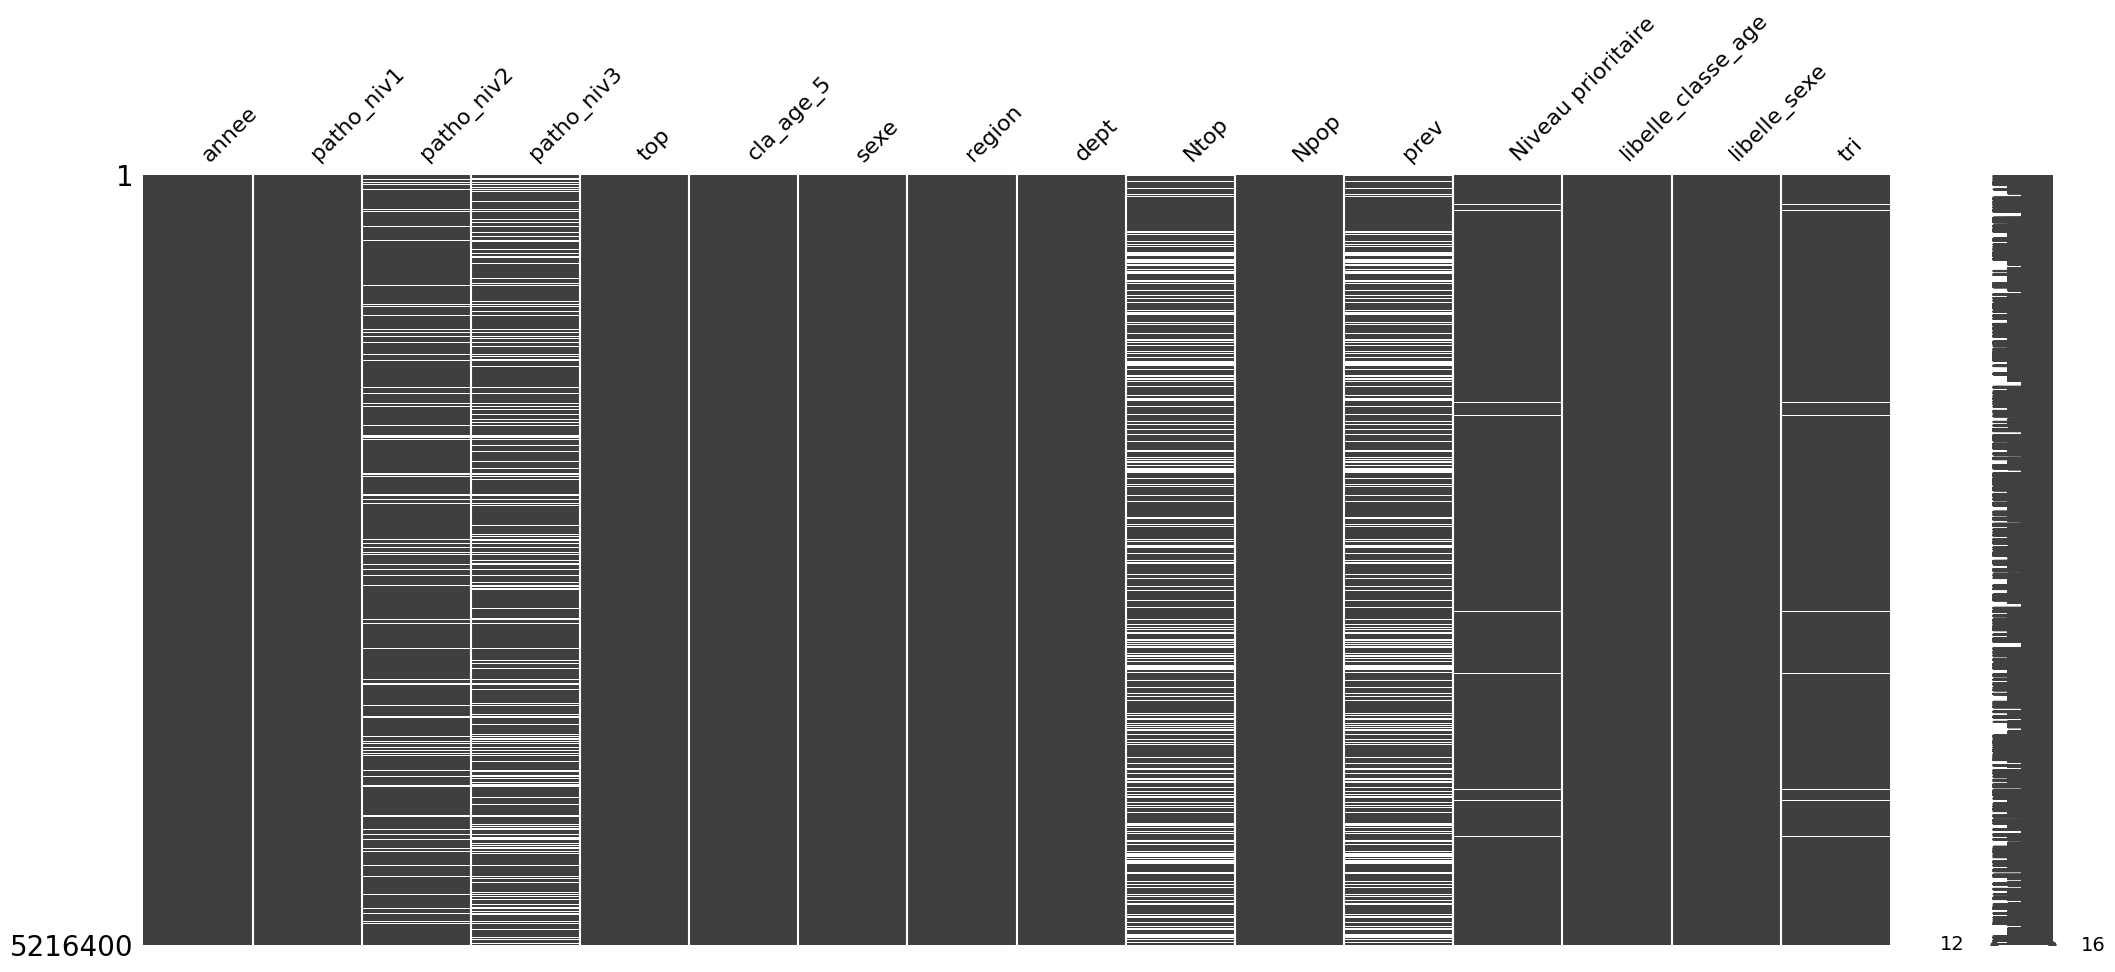

In [91]:
msno.matrix(Patho)
plt.show()


In [92]:
#1 = homme / 
Patho_filtre = Patho_filtre[['annee', 'patho_niv1','cla_age_5','sexe','region','dept','Npop']]
Patho_filtre
#penser que dans chaque ligne c'est un nb de pop touche dans 1 dept, 

,annee,patho_niv1,cla_age_5,sexe,region,dept,Npop
0,2023,Maladies cardioneurovasculaires,75-79,1,1,999,7290
1,2023,Maladies cardioneurovasculaires,75-79,1,2,972,7080
2,2023,Maladies cardioneurovasculaires,75-79,1,3,999,1590
3,2023,Maladies cardioneurovasculaires,75-79,1,4,999,10010
4,2023,Maladies cardioneurovasculaires,75-79,1,6,976,560
...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,70-74,1,11,91,21390
5216396,2017,Maladies cardioneurovasculaires,70-74,1,11,92,25370
5216397,2017,Maladies cardioneurovasculaires,70-74,1,11,93,23030
5216398,2017,Maladies cardioneurovasculaires,70-74,1,11,94,21920


In [93]:
Patho_filtre.to_csv("/Users/jeannegarcia/Patho.csv", index=False, encoding='utf-8')

Je prends que les sexes Hommes/ Femmes 

In [94]:
Patho_filtre = Patho_filtre[Patho_filtre['sexe'].isin([0, 1, 2])]
Patho_filtre

,annee,patho_niv1,cla_age_5,sexe,region,dept,Npop
0,2023,Maladies cardioneurovasculaires,75-79,1,1,999,7290
1,2023,Maladies cardioneurovasculaires,75-79,1,2,972,7080
2,2023,Maladies cardioneurovasculaires,75-79,1,3,999,1590
3,2023,Maladies cardioneurovasculaires,75-79,1,4,999,10010
4,2023,Maladies cardioneurovasculaires,75-79,1,6,976,560
...,...,...,...,...,...,...,...
5216395,2017,Maladies cardioneurovasculaires,70-74,1,11,91,21390
5216396,2017,Maladies cardioneurovasculaires,70-74,1,11,92,25370
5216397,2017,Maladies cardioneurovasculaires,70-74,1,11,93,23030
5216398,2017,Maladies cardioneurovasculaires,70-74,1,11,94,21920


In [95]:
Patho_group = Patho_filtre.groupby(['dept', 'sexe','cla_age_5',	'annee', 'patho_niv1','region'], as_index=False)['Npop'].sum()
Patho_group



,dept,sexe,cla_age_5,annee,patho_niv1,region,Npop
0,01,1,00-04,2015,Affections de longue durée (dont 31 et 32) pou...,84,18340
1,01,1,00-04,2015,Cancers,84,238420
2,01,1,00-04,2015,Maladies cardioneurovasculaires,84,275100
3,01,1,00-04,2015,Maladies du foie ou du pancréas (hors mucovisc...,84,18340
4,01,1,00-04,2015,Maladies inflammatoires ou rares ou infection VIH,84,201740
...,...,...,...,...,...,...,...
317515,999,2,tsage,2023,Maladies respiratoires chroniques (hors mucovi...,76,3170330
317516,999,2,tsage,2023,Maladies respiratoires chroniques (hors mucovi...,84,4177860
317517,999,2,tsage,2023,Maladies respiratoires chroniques (hors mucovi...,93,2807760
317518,999,2,tsage,2023,Maladies respiratoires chroniques (hors mucovi...,94,163200


In [96]:
tent= Patho_filtre.groupby(['patho_niv1'])
tent

In [97]:
valeurs_uniques = Patho_filtre['patho_niv1'].unique()
print(valeurs_uniques)

['Maladies cardioneurovasculaires'
 'Maladies du foie ou du pancréas (hors mucoviscidose)'
 "Affections de longue durée (dont 31 et 32) pour d'autres causes"
 'Cancers' 'Maladies inflammatoires ou rares ou infection VIH'
 'Maladies respiratoires chroniques (hors mucoviscidose)'
 'Maladies neurologiques']


In [98]:
# regarder si certains maladies plus dans certains départements (maldies / deptartements)
# certaines maladies marqué a ≠ age (groupe by maladie et tu regarde juste age et npop)
# y= maldie x=temps 
# et apres on peut regarder le sexe 

In [99]:
df_group = Patho_filtre.groupby(['dept', 'patho_niv1'])['Npop'].sum().reset_index()
df_group

,dept,patho_niv1,Npop
0,01,Affections de longue durée (dont 31 et 32) pou...,10946560
1,01,Cancers,142305280
2,01,Maladies cardioneurovasculaires,164198400
3,01,Maladies du foie ou du pancréas (hors mucovisc...,10946560
4,01,Maladies inflammatoires ou rares ou infection VIH,120412160
...,...,...,...
709,999,Maladies cardioneurovasculaires,35601648900
710,999,Maladies du foie ou du pancréas (hors mucovisc...,2373443260
711,999,Maladies inflammatoires ou rares ou infection VIH,26107875860
712,999,Maladies neurologiques,18987546080


In [100]:
df_group['patho_niv1'].unique()

array(["Affections de longue durée (dont 31 et 32) pour d'autres causes",
       'Cancers', 'Maladies cardioneurovasculaires',
       'Maladies du foie ou du pancréas (hors mucoviscidose)',
       'Maladies inflammatoires ou rares ou infection VIH',
       'Maladies neurologiques',
       'Maladies respiratoires chroniques (hors mucoviscidose)'],
      dtype=object)

Text(0, 0.5, 'Nombre de cas')

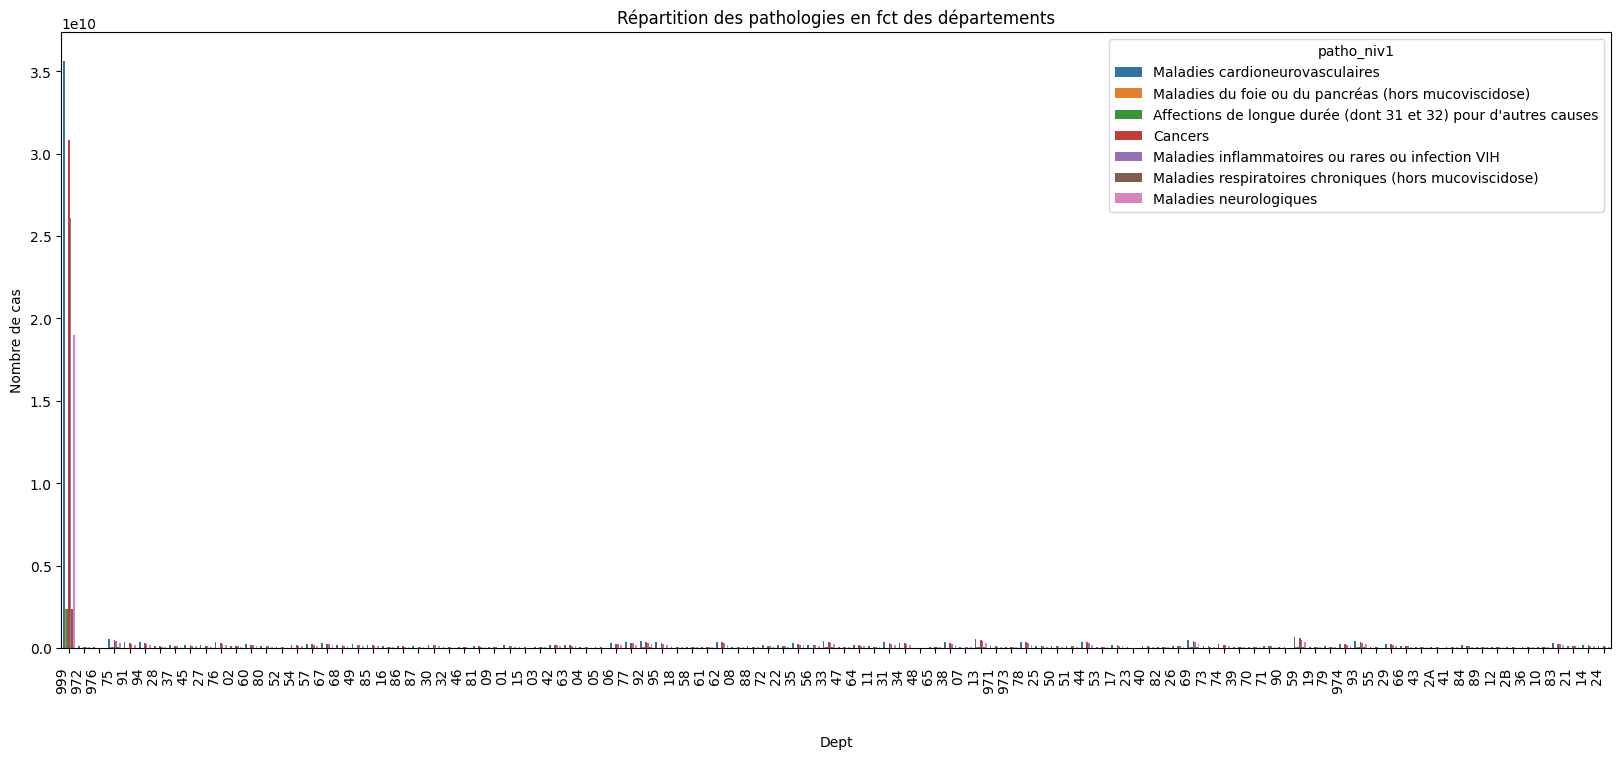

In [101]:
table = pd.crosstab(Patho_filtre['dept'],Patho_filtre['patho_niv1'])
 
plt.figure(figsize=(20,8))

sns.barplot(
    data=Patho_filtre,
    x='dept',
    y='Npop',
    hue='patho_niv1',
    estimator=sum,          
    errorbar=None           
)

plt.xticks(rotation=90, ha='right')
plt.tick_params(axis='x', pad=10)
plt.title("Répartition des pathologies en fct des départements")
plt.xlabel('Dept',labelpad=30)
plt.ylabel('Nombre de cas')

Outlier au département 999, creuser le pourquoi ? 

In [102]:
# Nombre de lignes avec dept manquant
Patho_filtre['dept'].isna().sum()

# Filtrer le département 999
Patho_filtre[Patho_filtre['dept'] == '999']['Npop'].sum()
Patho_filtre[Patho_filtre['dept'] == '41']['Npop'].sum()
Patho_filtre[Patho_filtre['dept'] == '972']['Npop'].sum()


np.int64(323949000)

OUTLIER AU 999 
visiblement + de 118672163000 cas dans le 999 vs  292034500 dans le 41 un departement normal 
donc on supprime le 999 

Text(0, 0.5, 'Nombre de cas')

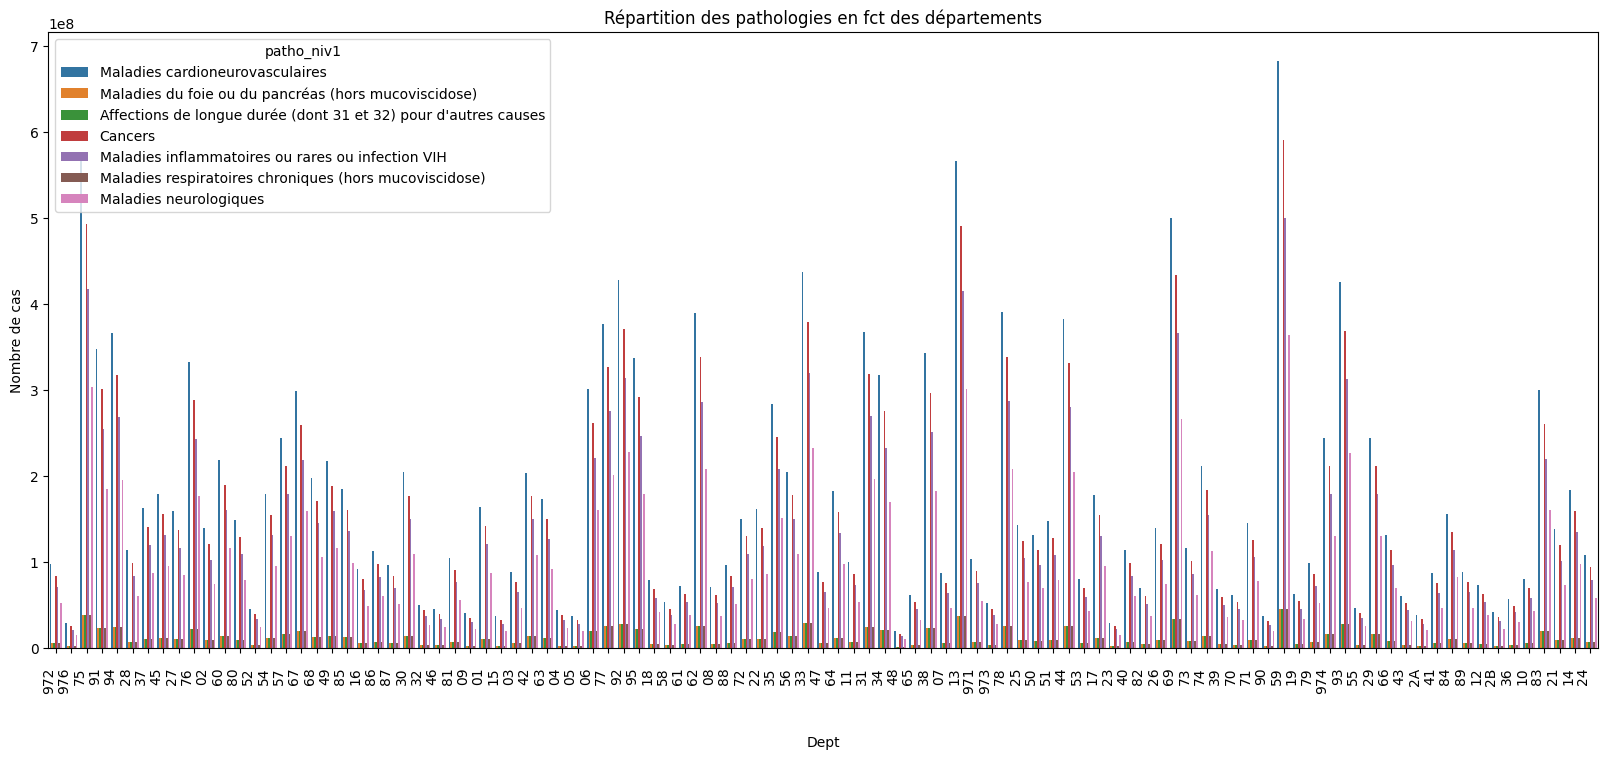

In [103]:
# Exclure le département 999
Patho_filtre_clean = Patho_filtre[Patho_filtre['dept'] != '999']

# Vérifier le crosstab si besoin
table= pd.crosstab(Patho_filtre_clean['dept'], Patho_filtre_clean['patho_niv1'])

plt.figure(figsize=(20,8))
sns.barplot(
    data=Patho_filtre_clean,
    x='dept',
    y='Npop', 
    hue='patho_niv1',
    estimator=sum, 
    errorbar=None
)


plt.xticks(rotation=90, ha='right')
plt.tick_params(axis='x', pad=10)
plt.title("Répartition des pathologies en fct des départements")
plt.xlabel('Dept',labelpad=30)
plt.ylabel('Nombre de cas')


Bien, mais pas le plot le plus optimal 

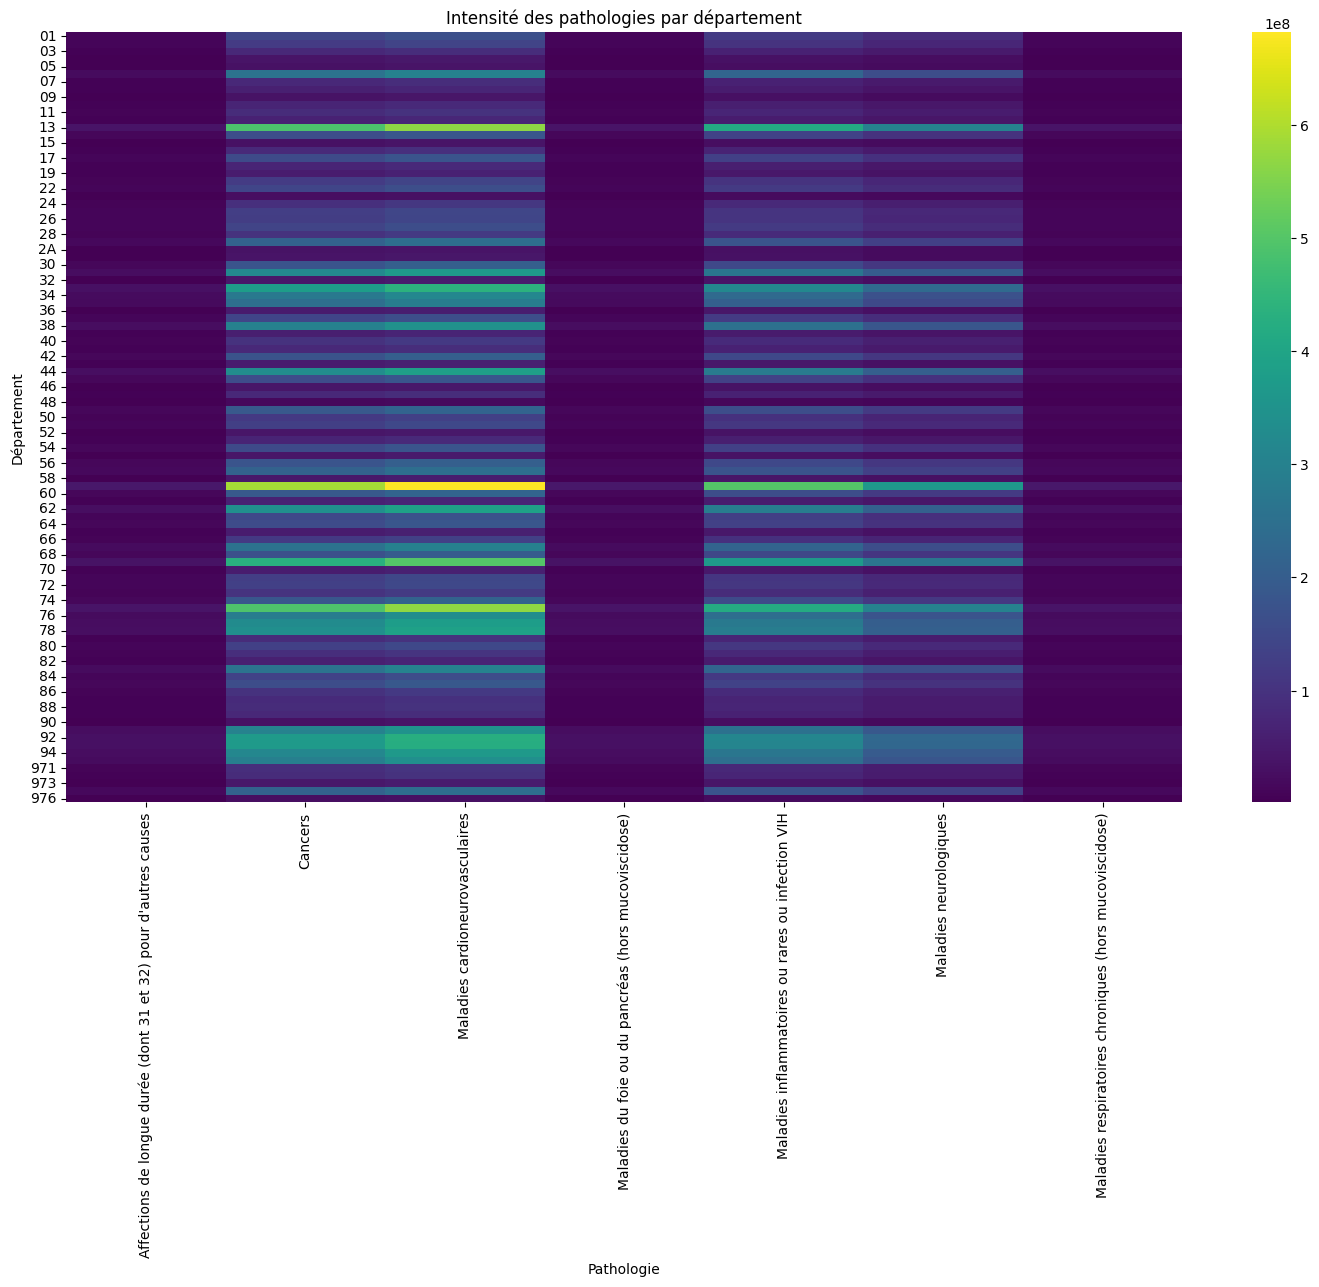

In [104]:
pivot = Patho_filtre_clean.pivot_table(
    index='dept',
    columns='patho_niv1',
    values='Npop',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(18, 10))
sns.heatmap(pivot, cmap='viridis')
plt.title("Intensité des pathologies par département")
plt.xlabel("Pathologie")
plt.ylabel("Département")
plt.show()



on se rends compte que 3 maladies sont similaires ... 


Tentative de carte 

Obervation Âge / Maladie 

In [105]:
Patho_filtre_clean.duplicated().sum()
Patho_filtre_clean[['dept', 'sexe', 'cla_age_5', 'annee', 'patho_niv1']].duplicated().sum()
Patho_filtre_clean['patho_niv1'].value_counts()



patho_niv1
Maladies cardioneurovasculaires                                    572670
Cancers                                                            496314
Maladies inflammatoires ou rares ou infection VIH                  419958
Maladies neurologiques                                             305424
Maladies du foie ou du pancréas (hors mucoviscidose)                38178
Affections de longue durée (dont 31 et 32) pour d'autres causes     38178
Maladies respiratoires chroniques (hors mucoviscidose)              38178
Name: count, dtype: int64

In [106]:
Patho_filtre_clean.groupby('dept').size().sort_values(ascending=False).head(10)
Patho_filtre_clean.groupby(['dept', 'annee']).size().sort_values(ascending=False).head(10)


dept  annee
01    2015     2100
69    2019     2100
66    2020     2100
      2021     2100
      2022     2100
      2023     2100
67    2015     2100
      2016     2100
      2017     2100
      2018     2100
dtype: int64

In [107]:
Patho_filtre_clean.groupby(['dept','annee']).size().sort_values(ascending=False).head()


dept  annee
01    2015     2100
69    2019     2100
66    2020     2100
      2021     2100
      2022     2100
dtype: int64

In [108]:
print(Patho_filtre_clean['patho_niv1'].unique())
print(Patho_filtre_clean['cla_age_5'].unique())

['Maladies cardioneurovasculaires'
 'Maladies du foie ou du pancréas (hors mucoviscidose)'
 "Affections de longue durée (dont 31 et 32) pour d'autres causes"
 'Cancers' 'Maladies inflammatoires ou rares ou infection VIH'
 'Maladies respiratoires chroniques (hors mucoviscidose)'
 'Maladies neurologiques']
['75-79' '80-84' '85-89' '90-94' '95et+' 'tsage' '00-04' '05-09' '10-14'
 '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-64' '65-69' '70-74']


In [109]:
Patho_filtre_clean[['cla_age_5','patho_niv1']].value_counts().head(20)


cla_age_5  patho_niv1                     
35-39      Maladies cardioneurovasculaires    27270
10-14      Maladies cardioneurovasculaires    27270
40-44      Maladies cardioneurovasculaires    27270
85-89      Maladies cardioneurovasculaires    27270
30-34      Maladies cardioneurovasculaires    27270
90-94      Maladies cardioneurovasculaires    27270
45-49      Maladies cardioneurovasculaires    27270
25-29      Maladies cardioneurovasculaires    27270
50-54      Maladies cardioneurovasculaires    27270
20-24      Maladies cardioneurovasculaires    27270
95et+      Maladies cardioneurovasculaires    27270
55-59      Maladies cardioneurovasculaires    27270
15-19      Maladies cardioneurovasculaires    27270
60-64      Maladies cardioneurovasculaires    27270
80-84      Maladies cardioneurovasculaires    27270
05-09      Maladies cardioneurovasculaires    27270
75-79      Maladies cardioneurovasculaires    27270
00-04      Maladies cardioneurovasculaires    27270
70-74      Maladies c

Donc probleme dans la structure de ma base, le 27270 correspond au nombre de ligne et pas au nsum donc / value_counts compte le nombre de lignes / 

In [110]:
Patho_group = Patho_filtre_clean.groupby(
    ['dept','annee','sexe','cla_age_5','patho_niv1','region'],
    as_index=False
)['Npop'].sum()

df = Patho_group.copy()

df.groupby(['cla_age_5','patho_niv1'])['Npop'].sum()


cla_age_5  patho_niv1                                                     
00-04      Affections de longue durée (dont 31 et 32) pour d'autres causes      32535720
           Cancers                                                             422964360
           Maladies cardioneurovasculaires                                     488035800
           Maladies du foie ou du pancréas (hors mucoviscidose)                 32535720
           Maladies inflammatoires ou rares ou infection VIH                   357892920
                                                                                 ...    
tsage      Maladies cardioneurovasculaires                                    8872558950
           Maladies du foie ou du pancréas (hors mucoviscidose)                591503930
           Maladies inflammatoires ou rares ou infection VIH                  6506543230
           Maladies neurologiques                                             4732031440
           Maladies respiratoires c

<function matplotlib.pyplot.show(close=None, block=None)>

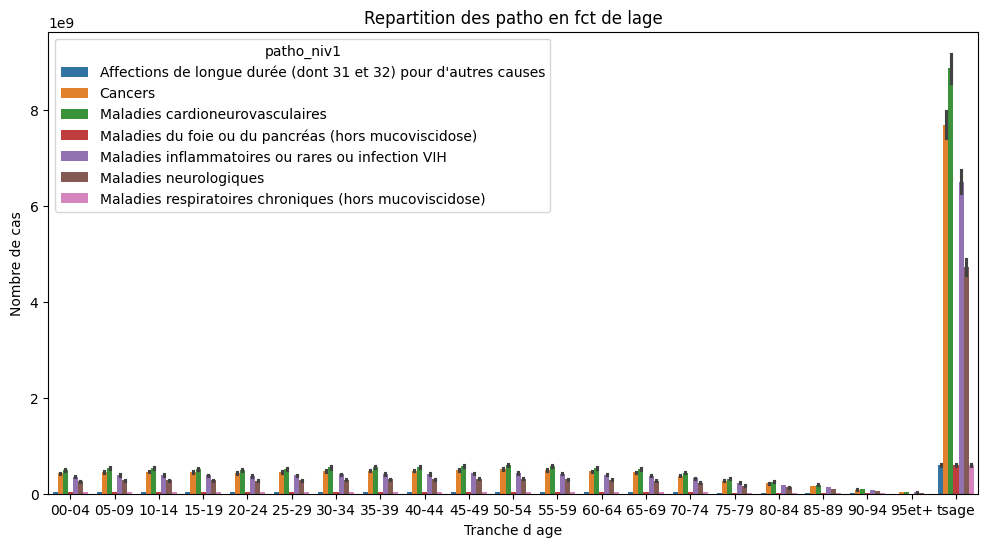

In [111]:

plt.figure(figsize=(12,6))

sns.barplot(
    data=df,
    x='cla_age_5',
    y='Npop',
    hue='patho_niv1',
    estimator=sum
)

plt.title('Repartition des patho en fct de lage')
plt.xlabel('Tranche d age')
plt.ylabel('Nombre de cas')

plt.show


In [112]:
# j'enleve tsage quis emble ecraser mes autres données 
df = Patho_group[Patho_group['cla_age_5'] != 'tsage'].copy()


# Vérifier qu'il reste bien les tranches d'âge normales
df['cla_age_5'].unique()


array(['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85-89', '90-94', '95et+'], dtype=object)

Je veux vérifier que mes données étaient bien écrasées 

In [113]:
table = (
    df.groupby(['cla_age_5', 'patho_niv1'])['Npop']
      .sum()
      .unstack(fill_value=0)
)

print(table)


patho_niv1  Affections de longue durée (dont 31 et 32) pour d'autres causes  \
cla_age_5                                                                     
00-04                                                32535720                 
05-09                                                35069910                 
10-14                                                35530900                 
15-19                                                34678300                 
20-24                                                33569770                 
25-29                                                34693970                 
30-34                                                36530640                 
35-39                                                37072410                 
40-44                                                37095170                 
45-49                                                38643960                 
50-54                                               

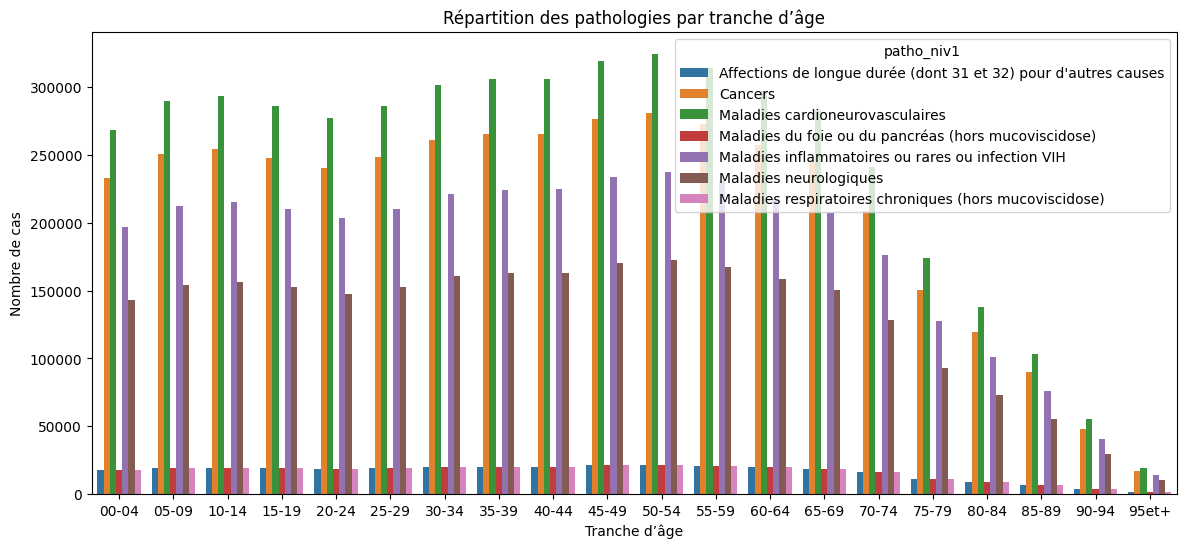

In [114]:
df_age =(
    df
    .groupby(['cla_age_5', 'patho_niv1'], as_index=False)['Npop']
    .sum()
    )
plt.figure(figsize=(14,6))
sns.barplot(
    data=df,
    x='cla_age_5',
    y='Npop',
    hue='patho_niv1',
    errorbar=None
)

plt.title("Répartition des pathologies par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de cas")
plt.show()



Voila qui est parfait 

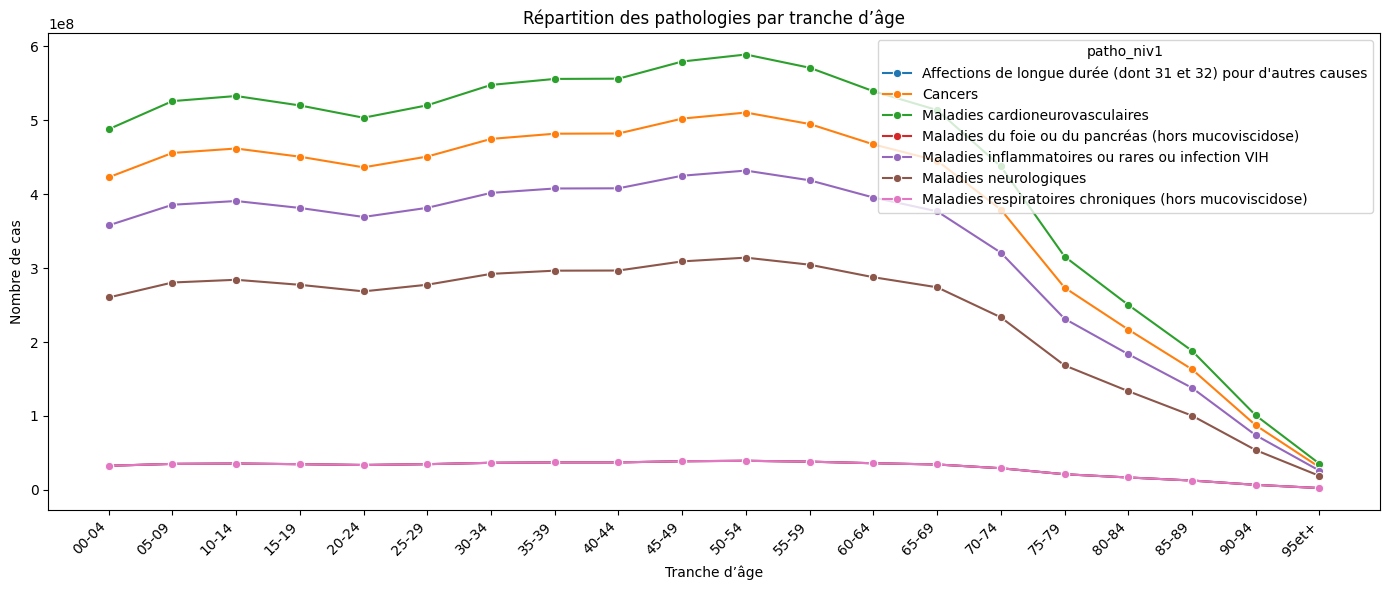

In [115]:
plt.figure(figsize=(14,6))

sns.lineplot(
    data=df_age,
    x='cla_age_5',
    y='Npop',
    hue='patho_niv1',
    marker='o'          # pour ressembler à geom_line + geom_point
)

plt.title("Répartition des pathologies par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


remarque je n'ai ni maladie du fois, pancrea ni affection 

A creuser également, tous le temps la maladie cardioneuro est supérieur pour touts les tranches d'âge

In [116]:
df['patho_niv1'].unique()
df.groupby('patho_niv1')['Npop'].sum().sort_values(ascending=False)



patho_niv1
Maladies cardioneurovasculaires                                    8872810800
Cancers                                                            7689769360
Maladies inflammatoires ou rares ou infection VIH                  6506727920
Maladies neurologiques                                             4732165760
Affections de longue durée (dont 31 et 32) pour d'autres causes     591520720
Maladies du foie ou du pancréas (hors mucoviscidose)                591520720
Maladies respiratoires chroniques (hors mucoviscidose)              591520720
Name: Npop, dtype: int64

Problème sur ces maladies:
Affections de longue durée (dont 31 et 32) pour d'autres causes     591520720
Maladies du foie ou du pancréas (hors mucoviscidose)                591520720
Maladies respiratoires chroniques (hors mucoviscidose)              591520720
Meme données surement même chose 

In [117]:
subset = df[df['patho_niv1'].isin([
    "Affections de longue durée (dont 31 et 32) pour d'autres causes",
    "Maladies du foie ou du pancréas (hors mucoviscidose)",
    "Maladies respiratoires chroniques (hors mucoviscidose)"
    
])]

subset.groupby(['dept','annee','sexe','cla_age_5','patho_niv1'])['Npop'].sum().unstack()



patho_niv1                 Affections de longue durée (dont 31 et 32) pour d'autres causes  \
dept annee sexe cla_age_5                                                                    
01   2015  1    00-04                                                  18340                 
                05-09                                                  19990                 
                10-14                                                  19650                 
                15-19                                                  17800                 
                20-24                                                  14170                 
...                                                                      ...                 
976  2023  2    75-79                                                    570                 
                80-84                                                    380                 
                85-89                                                    160                 
                90-94                                                     90                 
                95et+                                                     30                 

patho_niv1                 Maladies du foie ou du pancréas (hors mucoviscidose)  \
dept annee sexe cla_age_5                                                         
01   2015  1    00-04                                                  18340      
                05-09                                                  19990      
                10-14                                                  19650      
                15-19                                                  17800      
                20-24                                                  14170      
...                                                                      ...      
976  2023  2    75-79                                                    570      
                80-84                                                    380      
                85-89                                                    160      
                90-94                                                     90      
                95et+                                                     30      

patho_niv1                 Maladies respiratoires chroniques (hors mucoviscidose)  
dept annee sexe cla_age_5                                                          
01   2015  1    00-04                                                  18340       
                05-09                                                  19990       
                10-14                                                  19650       
                15-19                                                  17800       
                20-24                                                  14170       
...                                                                      ...       
976  2023  2    75-79                                                    570       
                80-84                                                    380       
                85-89                                                    160       
                90-94                                                     90       
                95et+                                                     30       

[36360 rows x 3 columns]

Je vais garder seulement 1 seule des 3 maladies etant donée que mon fichier les a cloné 

In [118]:
maladies_a_enlever = [
    "Maladies respiratoires chroniques (hors mucoviscidose)", 
    "Affections de longue durée (dont 31 et 32) pour d'autres causes",
]

df = df[~df['patho_niv1'].isin(maladies_a_enlever)].copy()

In [119]:
df['sexe'] = df['sexe'].replace({1: 'Homme', 2: 'Femme'})

In [120]:
df_sexe = (
    df
    .groupby(['patho_niv1','sexe'])['Npop']
    .sum()
    .reset_index()
)

print(df_sexe)

                                          patho_niv1   sexe        Npop
0                                            Cancers  Femme  4004716820
1                                            Cancers  Homme  3685052540
2                    Maladies cardioneurovasculaires  Femme  4620827100
3                    Maladies cardioneurovasculaires  Homme  4251983700
4  Maladies du foie ou du pancréas (hors mucovisc...  Femme   308055140
5  Maladies du foie ou du pancréas (hors mucovisc...  Homme   283465580
6  Maladies inflammatoires ou rares ou infection VIH  Femme  3388606540
7  Maladies inflammatoires ou rares ou infection VIH  Homme  3118121380
8                             Maladies neurologiques  Femme  2464441120
9                             Maladies neurologiques  Homme  2267724640


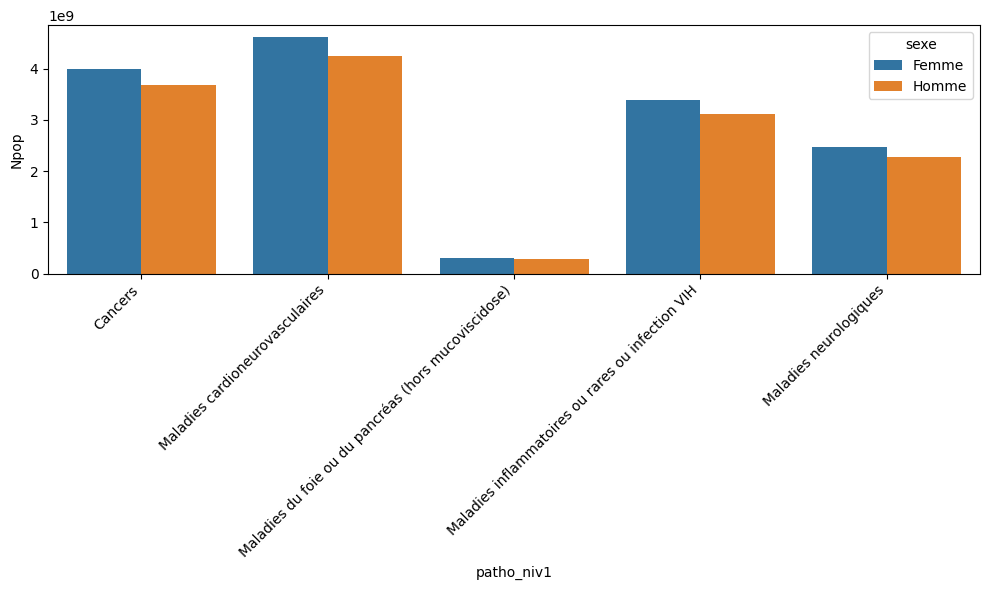

In [121]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_sexe, 
    x='patho_niv1',
    y='Npop',
    hue='sexe'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


OK pour la catégorie sexe 


In [122]:
print(df.columns)

Index(['dept', 'annee', 'sexe', 'cla_age_5', 'patho_niv1', 'region', 'Npop'], dtype='object')


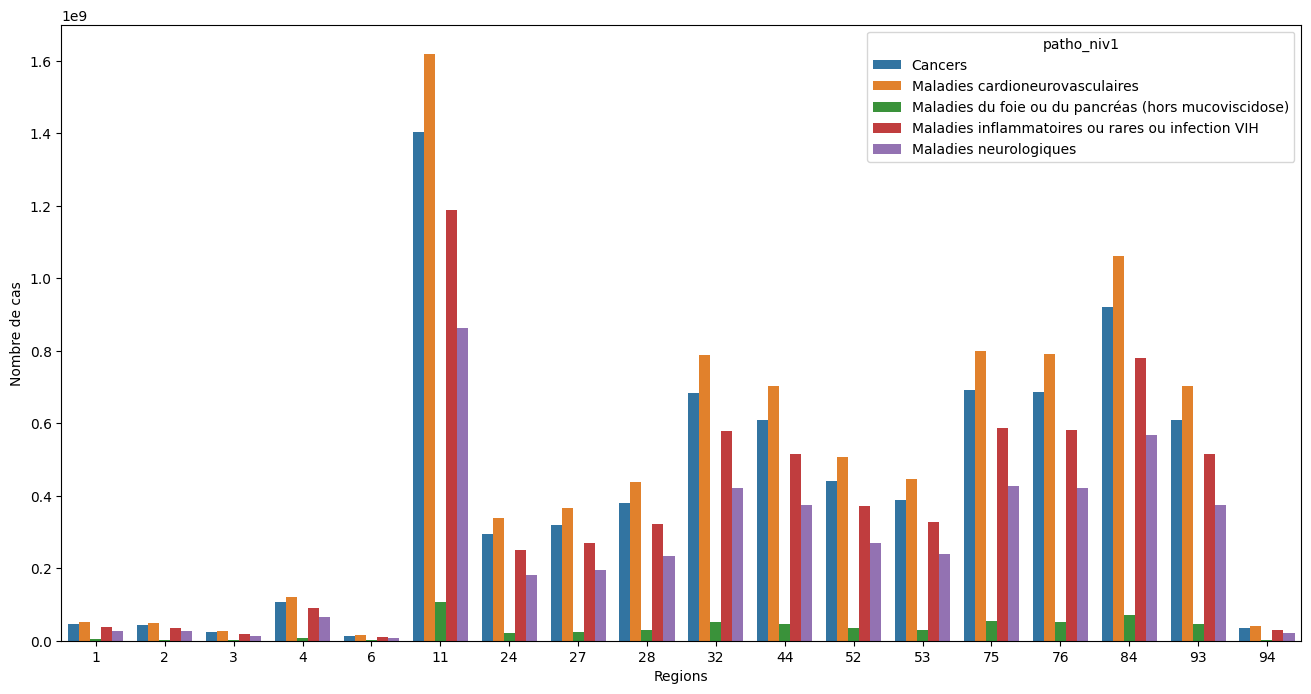

In [123]:
df_region = (
    df.groupby(['region', 'patho_niv1'])['Npop']
    .sum().reset_index()
)

plt.figure(figsize=(16,8))
sns.barplot(
    data=df_region,
    x='region',
    y='Npop',
    hue='patho_niv1'  
)


plt.xlabel('Regions')
plt.ylabel('Nombre de cas')
plt.show()

In [124]:
# Pour chaque région, lister les départements uniques
region_depts = df.groupby('region')['dept'].unique().reset_index()
region_depts


,region,dept
0,1,[971]
1,2,[972]
2,3,[973]
3,4,[974]
4,6,[976]
5,11,"[75, 77, 78, 91, 92, 93, 94, 95]"
6,24,"[18, 28, 36, 37, 41, 45]"
7,27,"[21, 25, 39, 58, 70, 71, 89, 90]"
8,28,"[14, 27, 50, 61, 76]"
9,32,"[02, 59, 60, 62, 80]"


j'ai supprimé que 999 mais on peut aussi supprimer tout les DOM TOM pour eviter des erreurs 

la où le moins de cas Corse (4) / et DOM TOM. 
ca serait bien de reussir à faire une map avec repartition des maladies 

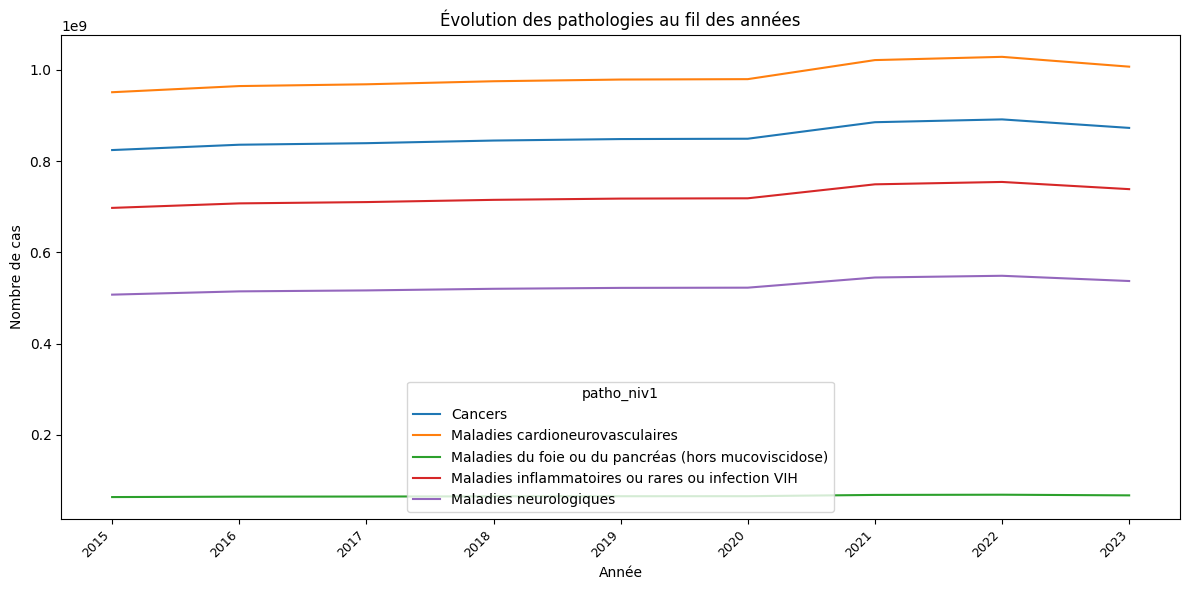

In [125]:
year_patho = (
    df.groupby(['annee', 'patho_niv1'])['Npop']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=year_patho,
    x='annee',
    y='Npop',
    hue='patho_niv1',
    estimator=None,       # indispensable pour tracer la vraie courbe
    lw=1.5                # équivalent de size=1.5
)

plt.title("Évolution des pathologies au fil des années")
plt.xlabel("Année")
plt.ylabel("Nombre de cas")

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

les courbes reste assez linéaire mais peu de recul, semble être assez similaire a voir courbe par courbe

In [126]:
maladies_focus = [
    "Cancers",
    "Maladies cardioneurovasculaires"
]

df_two = year_patho[year_patho['patho_niv1'].isin(maladies_focus)].copy()


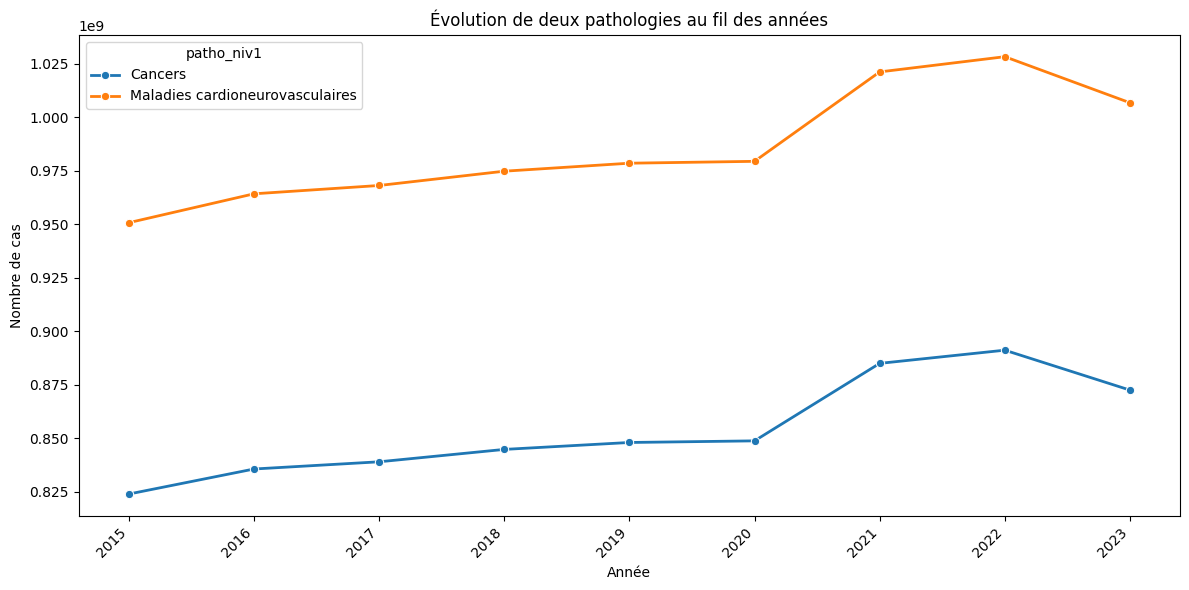

In [127]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_two,
    x='annee',
    y='Npop',
    hue='patho_niv1',
    lw=2,
    marker='o'
)

plt.title("Évolution de deux pathologies au fil des années")
plt.xlabel("Année")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [128]:
verif = year_patho.pivot_table(
    index='annee',
    columns='patho_niv1',
    values='Npop'
)

verif


patho_niv1,Cancers,Maladies cardioneurovasculaires,Maladies du foie ou du pancréas (hors mucoviscidose),Maladies inflammatoires ou rares ou infection VIH,Maladies neurologiques
annee,,,,,
2015,824048550.0,9.508252e+08,63388350.0,697271850.0,507106800.0
2016,835739060.0,9.643143e+08,64287620.0,707163820.0,514300960.0
2017,839109180.0,9.682029e+08,64546860.0,710015460.0,516374880.0
2018,844893920.0,9.748776e+08,64991840.0,714910240.0,519934720.0
2019,848132090.0,9.786140e+08,65240930.0,717650230.0,521927440.0
2020,848890380.0,9.794889e+08,65299260.0,718291860.0,522394080.0
2021,885092520.0,1.021261e+09,68084040.0,748924440.0,544672320.0
2022,891255820.0,1.028372e+09,68558140.0,754139540.0,548465120.0
2023,872607840.0,1.006855e+09,67123680.0,738360480.0,536989440.0


In [129]:
col1 = "Cancers"
col2 = "Maladies cardioneurovasculaires"


verif['diff'] = verif[col1] - verif[col2]
verif



patho_niv1,Cancers,Maladies cardioneurovasculaires,Maladies du foie ou du pancréas (hors mucoviscidose),Maladies inflammatoires ou rares ou infection VIH,Maladies neurologiques,diff
annee,,,,,,
2015,824048550.0,9.508252e+08,63388350.0,697271850.0,507106800.0,-126776700.0
2016,835739060.0,9.643143e+08,64287620.0,707163820.0,514300960.0,-128575240.0
2017,839109180.0,9.682029e+08,64546860.0,710015460.0,516374880.0,-129093720.0
2018,844893920.0,9.748776e+08,64991840.0,714910240.0,519934720.0,-129983680.0
2019,848132090.0,9.786140e+08,65240930.0,717650230.0,521927440.0,-130481860.0
2020,848890380.0,9.794889e+08,65299260.0,718291860.0,522394080.0,-130598520.0
2021,885092520.0,1.021261e+09,68084040.0,748924440.0,544672320.0,-136168080.0
2022,891255820.0,1.028372e+09,68558140.0,754139540.0,548465120.0,-137116280.0
2023,872607840.0,1.006855e+09,67123680.0,738360480.0,536989440.0,-134247360.0


juste une évolution similaire 

UNSUPERVIDED LEARNING 

ICI, on a des vb catégorielles dc cube multidimmensionelle 

On crée UNE MATRICE X avec ligne = 1 obs  / colone combianaison patho*sexe*age et valeur = npop
je prends départemetns et pas region car sinon pas assez de points 
on passe par un pivot car le PCA ne prend que des valeurs numériques 


In [130]:
df = df.copy()

# on crée une nouvelle variable var qui combine patho / sexe et classe d'age 
df['var'] = df['patho_niv1'] + "_" + df['sexe'].astype(str) + "_" + df['cla_age_5']

#on indexe les departements et chaque colonne devient var 
df_pivot = df.pivot_table(
    index='dept',
    columns='var',
    values='Npop',
    aggfunc='sum', #si même combinaison on sum 
    fill_value=0
)


Variance expliquée : [0.95279053 0.03414859]


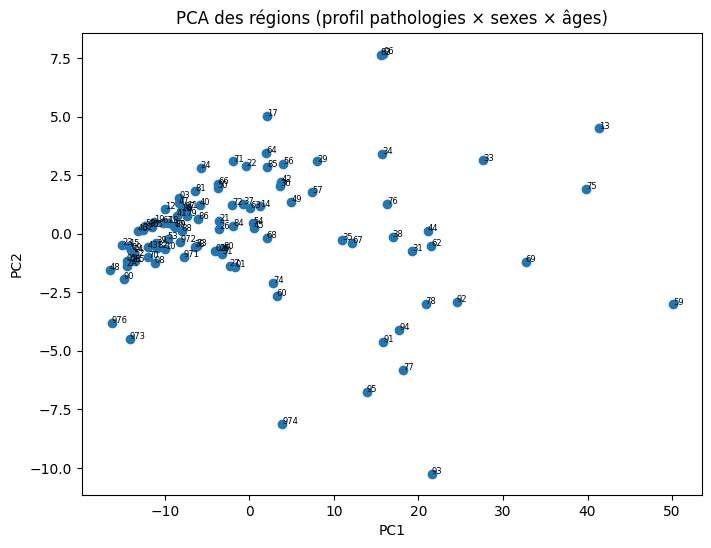

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot)

pca = PCA(n_components=2)
scores = pca.fit_transform(X_scaled)

print("Variance expliquée :", pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(scores[:,0], scores[:,1])

for i, reg in enumerate(df_pivot.index):
    plt.text(scores[i,0], scores[i,1], reg,fontsize=6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA des régions (profil pathologies × sexes × âges)")
plt.show()




Je rajoute un Kmeans 

In [132]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(X_scaled)
pd.crosstab(df_pivot.index, labels)

col_0,0,1
row_0,,
01,1,0
02,1,0
03,1,0
04,1,0
05,1,0
...,...,...
971,1,0
972,1,0
973,1,0


In [133]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(X_scaled)
pd.crosstab(df_pivot.index, labels)

col_0,0,1,2
row_0,,,
01,0,0,1
02,0,0,1
03,1,0,0
04,1,0,0
05,1,0,0
...,...,...,...
971,1,0,0
972,1,0,0
973,1,0,0


In [134]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(X_scaled)
pd.crosstab(df_pivot.index, labels)

col_0,0,1,2,3
row_0,,,,
01,0,0,0,1
02,0,0,0,1
03,1,0,0,0
04,1,0,0,0
05,1,0,0,0
...,...,...,...,...
971,1,0,0,0
972,1,0,0,0
973,1,0,0,0


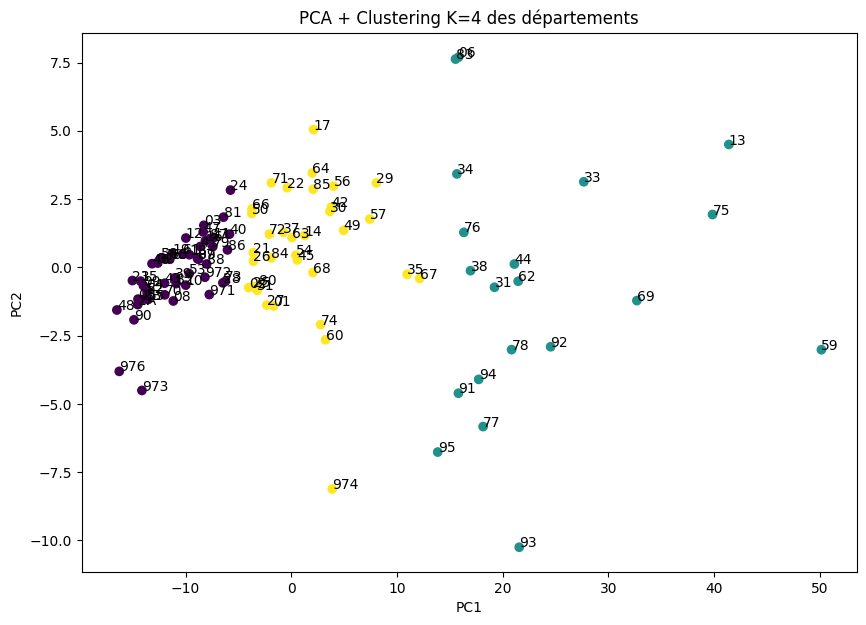

In [135]:
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(X_scaled)

plt.figure(figsize=(10,7))
plt.scatter(scores[:,0], scores[:,1], c=labels)

# pour avoir les departements 
for i, d in enumerate(df_pivot.index):
    plt.text(scores[i,0], scores[i,1], str(d))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA + Clustering K=4 des départements")
plt.show()


INTERPRETATION : 
PC1 = intensité de l'épidemie et PC2 = par age & type de patho 
4 groupes différents de départements: 
bleau foncé avec PC1 - et PC2 proche de 0 : pas d'extremes patho repartis de facon équilibré(notamment les outres-mers)
turquoise: 29 (Finistère), 17, 85, 56, 72, peut-être régions littorales ou ouest pas “métropoles majores”, pop plus agés pas extremes 
rose: De plus fortes différences internes, Départements présentant des profils pathologiques atypiques (etendu sur tout le PC2) point extremes : 93, 95, 77,
rouge: plus dispersé et plu intense presence de paris notamment: Bouches-du-Rhône/Rhône/Nord

In [136]:
df_age_patho = df.groupby(
    ['cla_age_5', 'patho_niv1']
)['Npop'].sum().unstack(fill_value=0)

df_age_patho


patho_niv1,Cancers,Maladies cardioneurovasculaires,Maladies du foie ou du pancréas (hors mucoviscidose),Maladies inflammatoires ou rares ou infection VIH,Maladies neurologiques
cla_age_5,,,,,
00-04,422964360,488035800,32535720,357892920,260285760
05-09,455908830,526048650,35069910,385769010,280559280
10-14,461901700,532963500,35530900,390839900,284247200
15-19,450817900,520174500,34678300,381461300,277426400
20-24,436407010,503546550,33569770,369267470,268558160
25-29,451021610,520409550,34693970,381633670,277551760
30-34,474898320,547959600,36530640,401837040,292245120
35-39,481941330,556086150,37072410,407796510,296579280
40-44,482237210,556427550,37095170,408046870,296761360


Variance expliquée : [1.00000000e+00 8.71357847e-33]


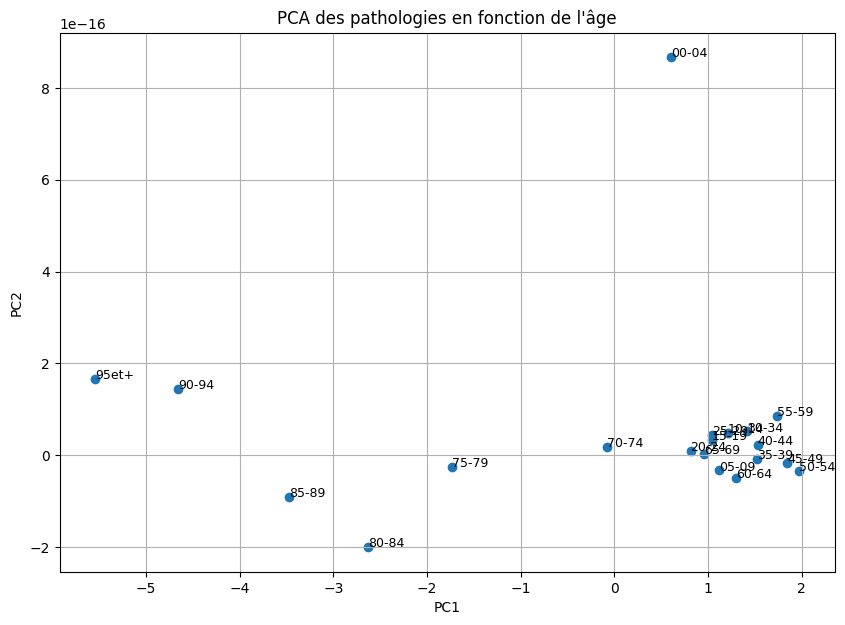

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardisation
X = df_age_patho.values
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
scores = pca.fit_transform(X_scaled)

print("Variance expliquée :", pca.explained_variance_ratio_)

plt.figure(figsize=(10,7))
plt.scatter(scores[:,0], scores[:,1])

for i, age in enumerate(df_age_patho.index):
    plt.text(scores[i,0], scores[i,1], age, fontsize=9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA des pathologies en fonction de l'âge")
plt.grid(True)
plt.show()


A première vue, outlier de 0-4 mais regarder avec un clustering

classe jeune isolé avec un PC2 très élévé: Les enfants 0–4 ans ont un profil de pathologies radicalement différent du reste de la population. Notament maladies respiratoires. 

Les personnes très âgées (80–84, 85–89, 90–94, 95+) forment un groupe distinct. (PC1 negatif et dipersé en PC2) on peut même remarqué une progression de 80 à 95+ vers le PC2 : Cardio + neuro + cancers tardifs

20-70 ans : profil pathologique très semblable: Pathologies mixtes


70-79: transition 

In [138]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(X_scaled)
pd.crosstab(df_age_patho.index, labels)

col_0,0,1
row_0,,
00-04,1,0
05-09,1,0
10-14,1,0
15-19,1,0
20-24,1,0
25-29,1,0
30-34,1,0
35-39,1,0
40-44,1,0


In [139]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(X_scaled)
pd.crosstab(df_age_patho.index, labels)

col_0,0,1,2
row_0,,,
00-04,1,0,0
05-09,1,0,0
10-14,1,0,0
15-19,1,0,0
20-24,1,0,0
25-29,1,0,0
30-34,1,0,0
35-39,1,0,0
40-44,1,0,0


In [140]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(X_scaled)
pd.crosstab(df_age_patho.index, labels)

col_0,0,1,2,3
row_0,,,,
00-04,0,0,0,1
05-09,0,0,0,1
10-14,0,0,0,1
15-19,0,0,0,1
20-24,0,0,0,1
25-29,0,0,0,1
30-34,1,0,0,0
35-39,1,0,0,0
40-44,1,0,0,0


3 semble être le plus approprié 

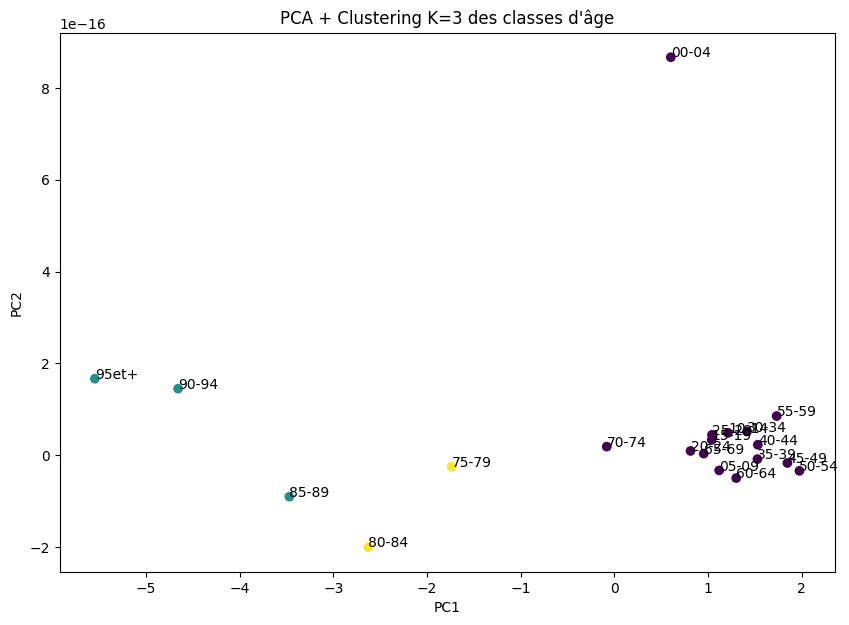

In [141]:
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(X_scaled)
plt.figure(figsize=(10,7))

plt.scatter(scores[:,0], scores[:,1], c=labels)

# pour avoir les departements 
for i, d in enumerate(df_age_patho.index):
    plt.text(scores[i,0], scores[i,1], str(d))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA + Clustering K=3 des classes d'âge")
plt.show()


D'après le clustering, differentes classes: 


peut être essayer un autre clustering ? DBSCAN ? 


elbow : valeu de k au plateau 


j'ai essayé sexe*pathologie donne pas grand chose  mais le prof vient de dire que au contraire fallait garder ce qui marchait pas 

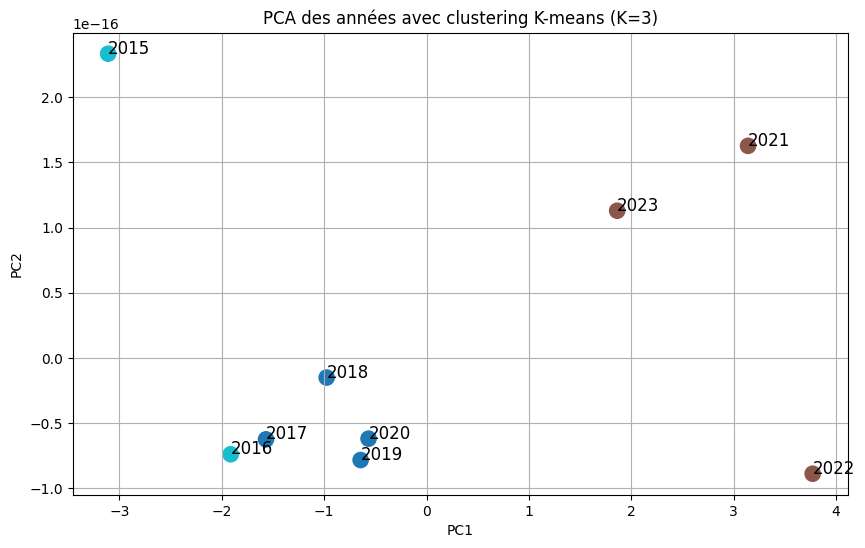

In [142]:
df_year = (
    df
    .groupby(["annee", "patho_niv1"])["Npop"]
    .sum()
    .unstack()
    .fillna(0)
)
df_year.index = df_year.index.astype(int)


X = StandardScaler().fit_transform(df_year)
pca = PCA(n_components=2)
scores = pca.fit_transform(X)

k = 3   
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(scores)


plt.figure(figsize=(10,6))
plt.scatter(scores[:,0], scores[:,1], c=labels, cmap="tab10", s=120)

labels_clean = [str(int(x)) for x in df_year.index]

# Ajout des labels (années)
for i, year in enumerate(labels_clean):
    plt.text(scores[i,0], scores[i,1], year, fontsize=12)


plt.title(f"PCA des années avec clustering K-means (K={k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

interprétation 3 groupes: 
2015: PC2 reès élévé mais PC1 fable : debut du data set 
2016-2020:periode stabke prè-covid 
2021-2023: groupe distinct, traduisant l’impact massif de la crise sanitaire COVID-19 et de ses effets prolongés sur les pathologies.
Les modifications structurelles du profil pathologique expliquent leur éloignement sur PC1.

a voir juste pq Kmeans me donne des groupes ≠ notamment sur 2016 ?

peut etre regarde ce rapport pour completer: https://www.cdc.gov/nchs/data/nvsr/nvsr73/nvsr73-04.pdf

le prof dit que l'on doit rajouter des références (livres / books)
Intro 
Methode des données
Results
Discussion 
References 
Annexe 